# Random forest

# what is random forest?
#### think of random forest as a group of decision trees like asking 100 friends for advaice and taking the majority votes
### insted of trusting one data
- crate many trees with differant data
- each tree gives it decision
- the forest takes the most polular decision
- these helps make better, stronger,and less  biased predictions

# y use random forest  ? 
| feature | meaning |
|--------|---------|
| more accurate |combines more opinion (trees)|
|handles missing values| can manage incomple data |
| less overfitting | trees want memorize the data |
| it is slower | more trees is more complitions of data|

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [8]:
df = sns.load_dataset("titanic")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [9]:
# select only relavent colums and drop row and missing data

In [10]:
df = df[["survived","pclass","sex","age","fare","embarked"]]
df = df.dropna()
print(df)

     survived  pclass     sex   age     fare embarked
0           0       3    male  22.0   7.2500        S
1           1       1  female  38.0  71.2833        C
2           1       3  female  26.0   7.9250        S
3           1       1  female  35.0  53.1000        S
4           0       3    male  35.0   8.0500        S
..        ...     ...     ...   ...      ...      ...
885         0       3  female  39.0  29.1250        Q
886         0       2    male  27.0  13.0000        S
887         1       1  female  19.0  30.0000        S
889         1       1    male  26.0  30.0000        C
890         0       3    male  32.0   7.7500        Q

[712 rows x 6 columns]


In [11]:
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [12]:
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["embarked"] = le.fit_transform(df["embarked"])

# Define input features(X) and output(y)¶

In [13]:
X = df[["pclass","sex","age","fare","embarked"]]
y = df["survived"]

In [14]:
print(X)

     pclass  sex   age     fare  embarked
0         3    1  22.0   7.2500         2
1         1    0  38.0  71.2833         0
2         3    0  26.0   7.9250         2
3         1    0  35.0  53.1000         2
4         3    1  35.0   8.0500         2
..      ...  ...   ...      ...       ...
885       3    0  39.0  29.1250         1
886       2    1  27.0  13.0000         2
887       1    0  19.0  30.0000         2
889       1    1  26.0  30.0000         0
890       3    1  32.0   7.7500         1

[712 rows x 5 columns]


In [15]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 712, dtype: int64


# split data 80% for traning 20% of testing

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# we create a random forest with 100 trees and train on it traning data

In [17]:
rf  = RandomForestClassifier(n_estimators = 100 ,random_state =42)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### predict and evaluate

In [18]:
y_pred = rf.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.7692307692307693


### classification report 

In [19]:
print("classification report :\n",classification_report(y_test,y_pred))

classification report :
               precision    recall  f1-score   support

           0       0.77      0.84      0.80        80
           1       0.77      0.68      0.72        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



#### confusion matrix

In [20]:
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[67 13]
 [20 43]]


confusion matrix
 [[67 13]
 [20 43]]


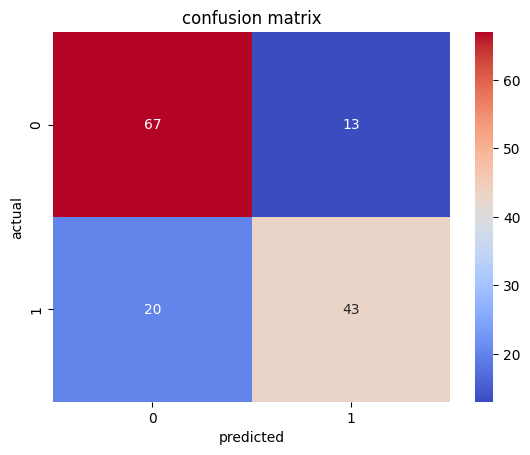

In [27]:
print("confusion matrix\n",confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()